# Analisis de Datos del Grupo C
## **Universidad Nacional del Comahue y Universidad del Salvador**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importantes del dataset

# Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para así mantener una consistencia.

In [65]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

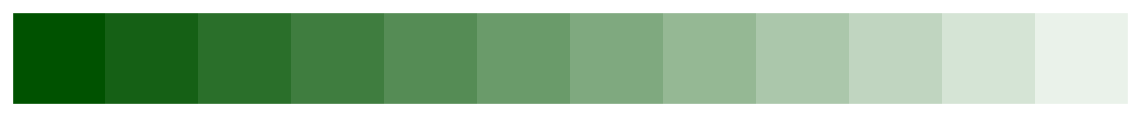

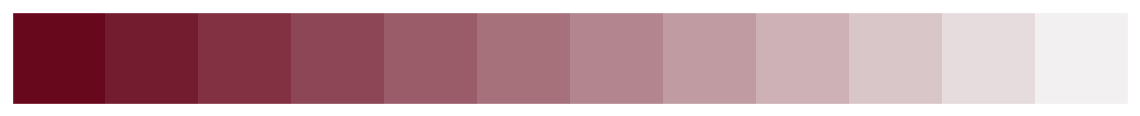

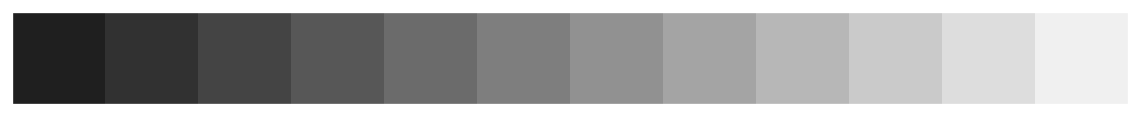

In [66]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

# Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [67]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoB_comahue_universidad'
university1_name = 'Universidad de Comahue'

university2 = 'GrupoB_salvador_universidad'
university2_name = 'Universidad del Salvador'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)


# Primer acercamiento, correcciones y transformaciones adicionales

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos

In [68]:
#imprimimos las columnas
df_1.columns 

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [69]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1118 non-null   object
 1   career            1118 non-null   object
 2   inscription_date  1118 non-null   object
 3   first_name        1118 non-null   object
 4   last_name         1118 non-null   object
 5   gender            1118 non-null   object
 6   age               1118 non-null   int64 
 7   postal_code       1118 non-null   int64 
 8   location          1118 non-null   object
 9   email             1118 non-null   object
dtypes: int64(2), object(8)
memory usage: 87.5+ KB


In [70]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1904 non-null   int64 
 1   university        1904 non-null   object
 2   career            1904 non-null   object
 3   inscription_date  1904 non-null   object
 4   first_name        1904 non-null   object
 5   last_name         1904 non-null   object
 6   gender            1904 non-null   object
 7   age               1904 non-null   int64 
 8   postal_code       1904 non-null   int64 
 9   location          1904 non-null   object
 10  email             1904 non-null   object
dtypes: int64(3), object(8)
memory usage: 163.8+ KB


In [71]:
print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la Universidad de Comahue es de: 33
La cantida de carreras en la Universidad del Salvador es de: 33


In [72]:
df_1.describe()

,age,postal_code
count,1118.000000,1118.00000
mean,53.618962,4785.59034
std,21.080518,2219.06045
min,18.000000,1601.00000
25%,35.000000,2852.00000
50%,54.000000,4622.00000
75%,72.000000,6461.00000
max,90.000000,9421.00000


In [73]:
df_2.describe()

,Unnamed: 0,age,postal_code
count,1904.000000,1904.000000,1904.000000
mean,951.500000,46.662815,4746.803571
std,549.781775,30.768844,2198.204426
min,0.000000,1.000000,1602.000000
25%,475.750000,16.000000,2942.000000
50%,951.500000,44.500000,4184.000000
75%,1427.250000,73.250000,6472.000000
max,1903.000000,102.000000,9421.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica. Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Text(0, 0.5, 'Cantidad')

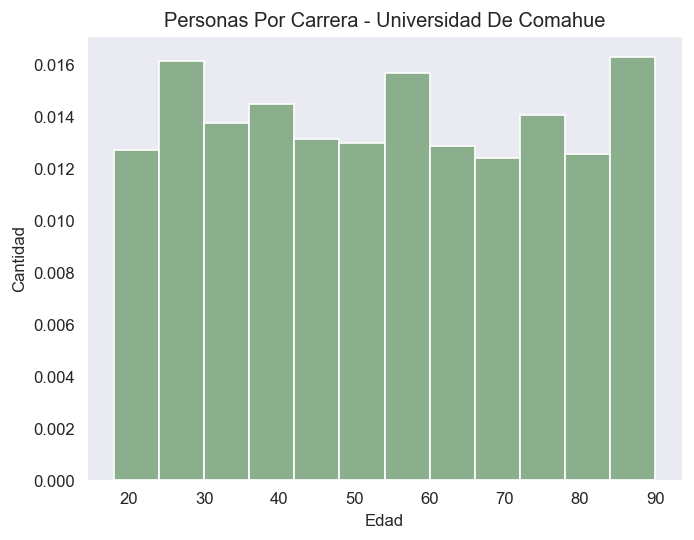

In [74]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

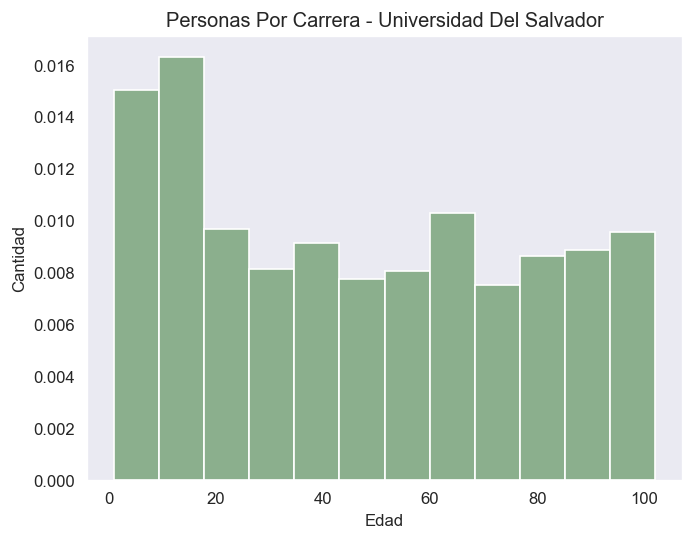

In [75]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Como vemos que las edades tienen valores que no son coherentes, como serían alumnos menores de 15 años y mayores de 85, siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1).

(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

In [76]:
df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_2.age.between(15,85)]

Text(0, 0.5, 'Carrera')

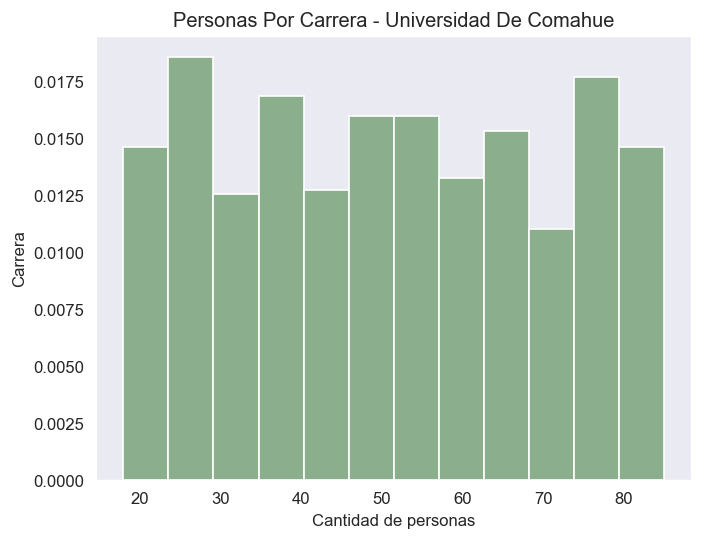

In [77]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

La distribución de las dedades para esta universidad parece tratarse de una distribución uniforme.

Text(0, 0.5, 'Cantidad')

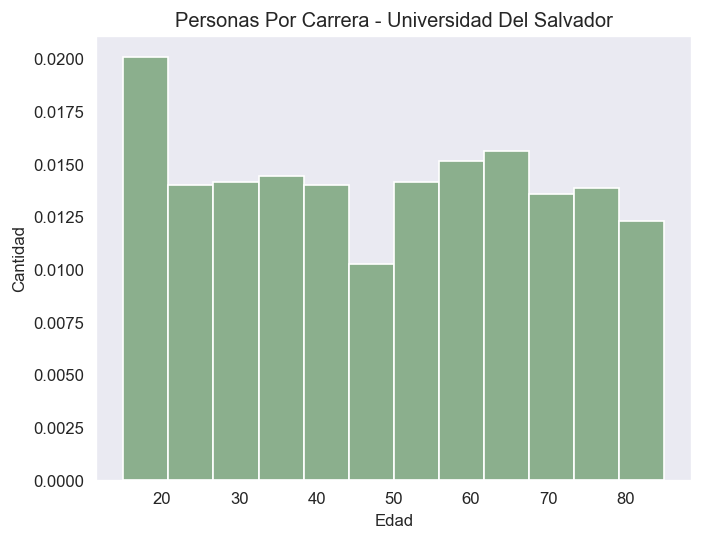

In [78]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [79]:
df_geonames.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [80]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [81]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [82]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [83]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,8129,FELIPE SOLA,Buenos Aires,B,-38.0167,-62.8333,4.0,univ. nacional del comahue,contador público,2020-10-31,amanda,hill,female,32,17 de agosto,tyler57@hotmail.com
1,AR,8129,DIECISIETE DE AGOSTO,Buenos Aires,B,-37.9167,-62.9333,4.0,univ. nacional del comahue,contador público,2020-10-31,amanda,hill,female,32,17 de agosto,tyler57@hotmail.com


In [84]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_2geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,Unnamed: 0,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,2747,CORONEL ISLEÑO,Buenos Aires,B,-34.4167,-60.40,4.0,0,universidad del salvador,licenciatura en administración,2020-09-17,james,gonzalez,male,80,coronel isleños,josephjackson@hotmail.com
1,AR,2747,INES INDART,Buenos Aires,B,-34.4000,-60.55,4.0,0,universidad del salvador,licenciatura en administración,2020-09-17,james,gonzalez,male,80,coronel isleños,josephjackson@hotmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

# Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

### Curriculas

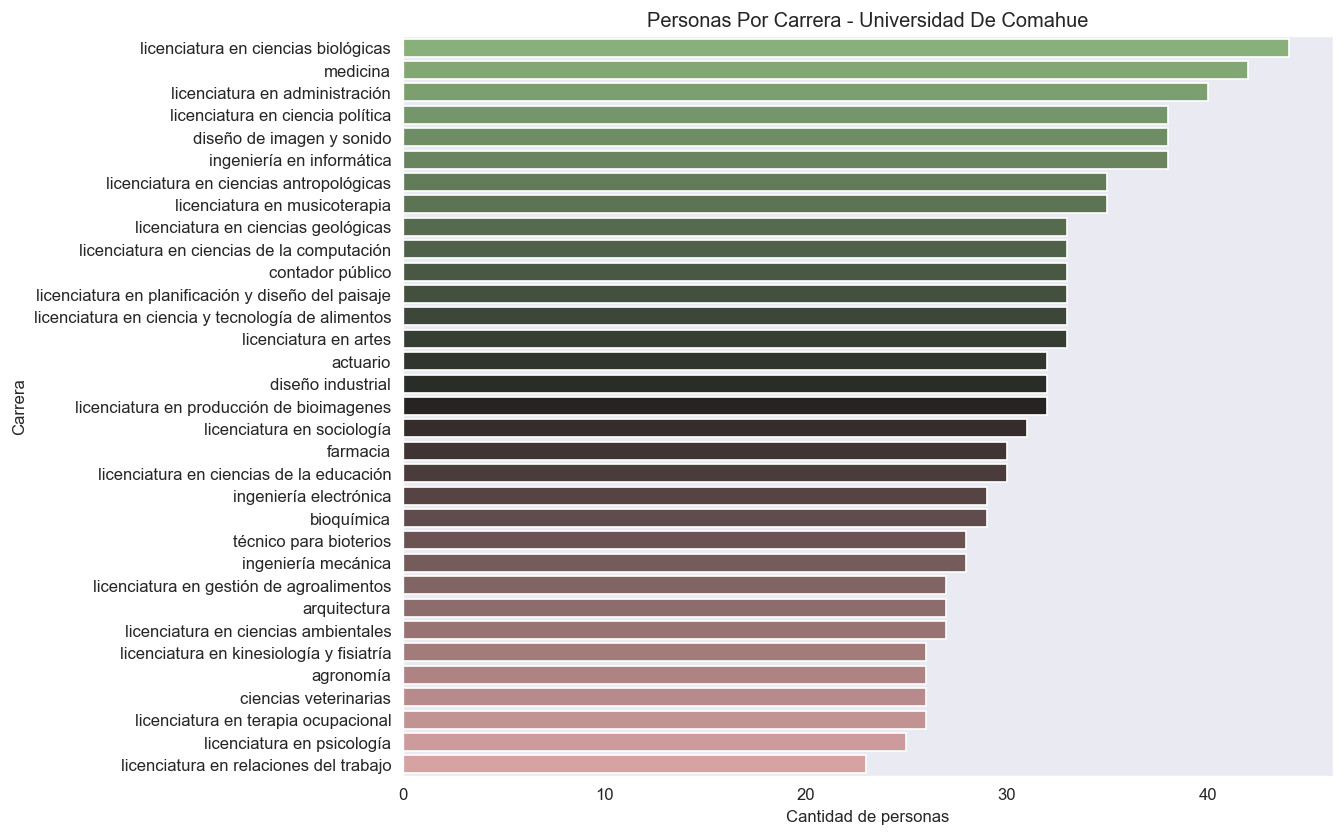

In [85]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera.

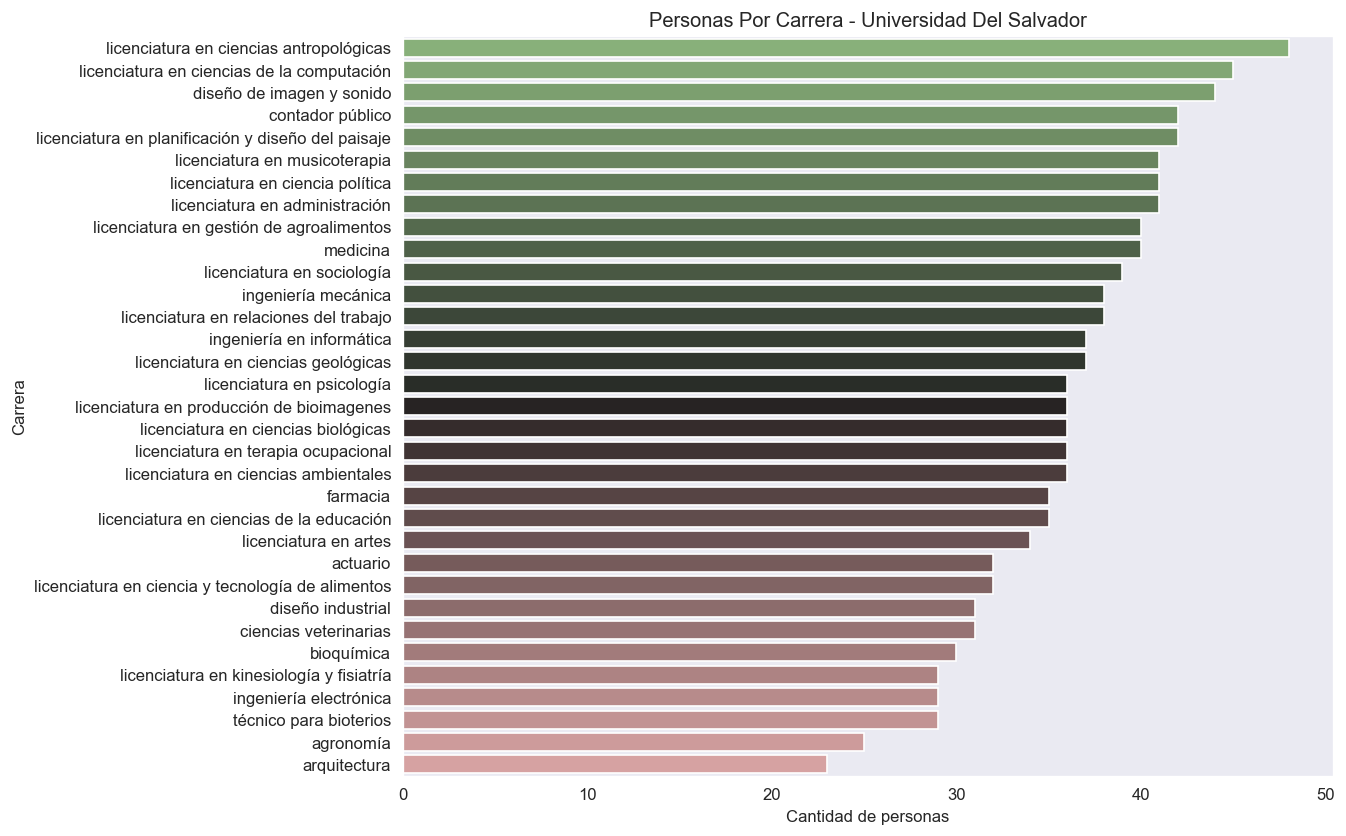

In [86]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es más grande y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.

## Detalle de la variable carrera

Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.



### Universidad Nacional del Comahue

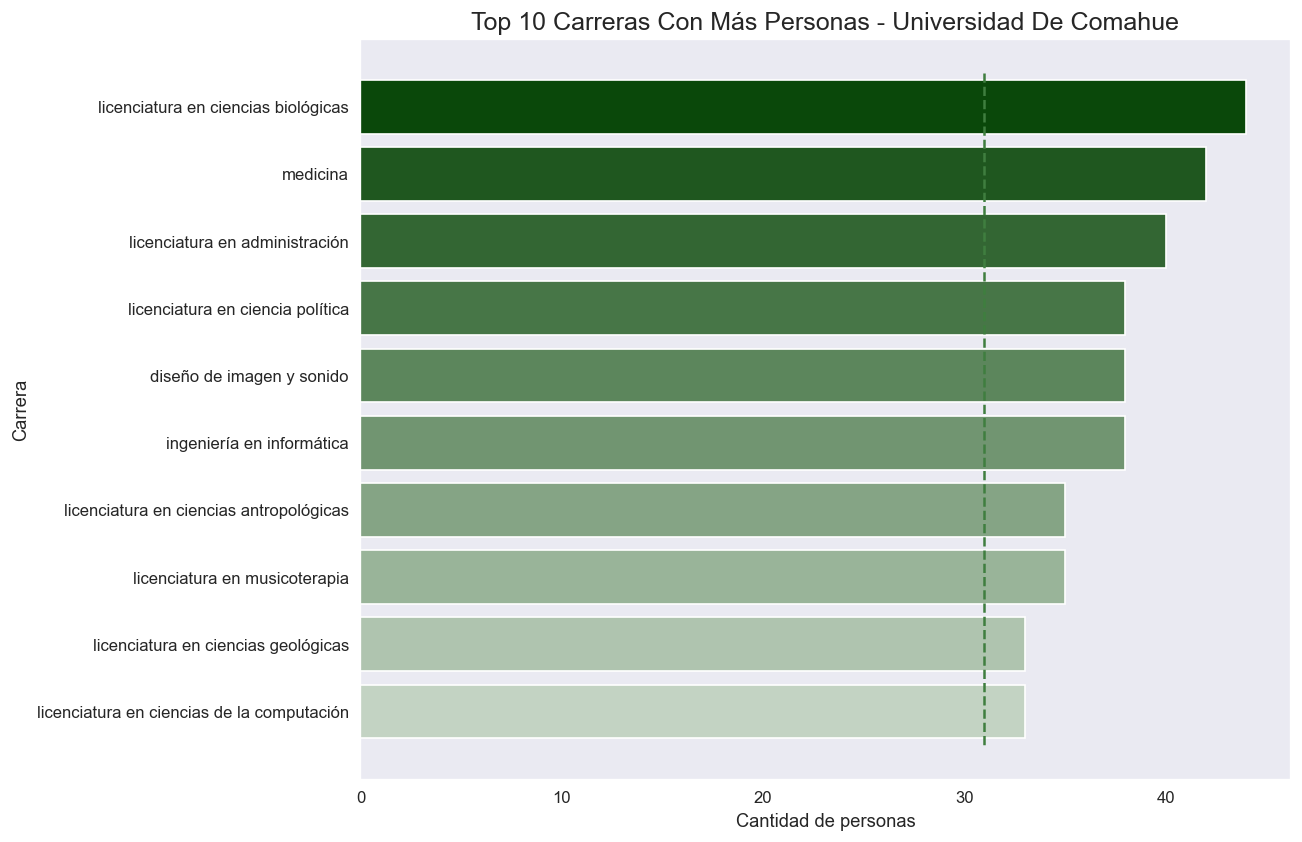

In [87]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

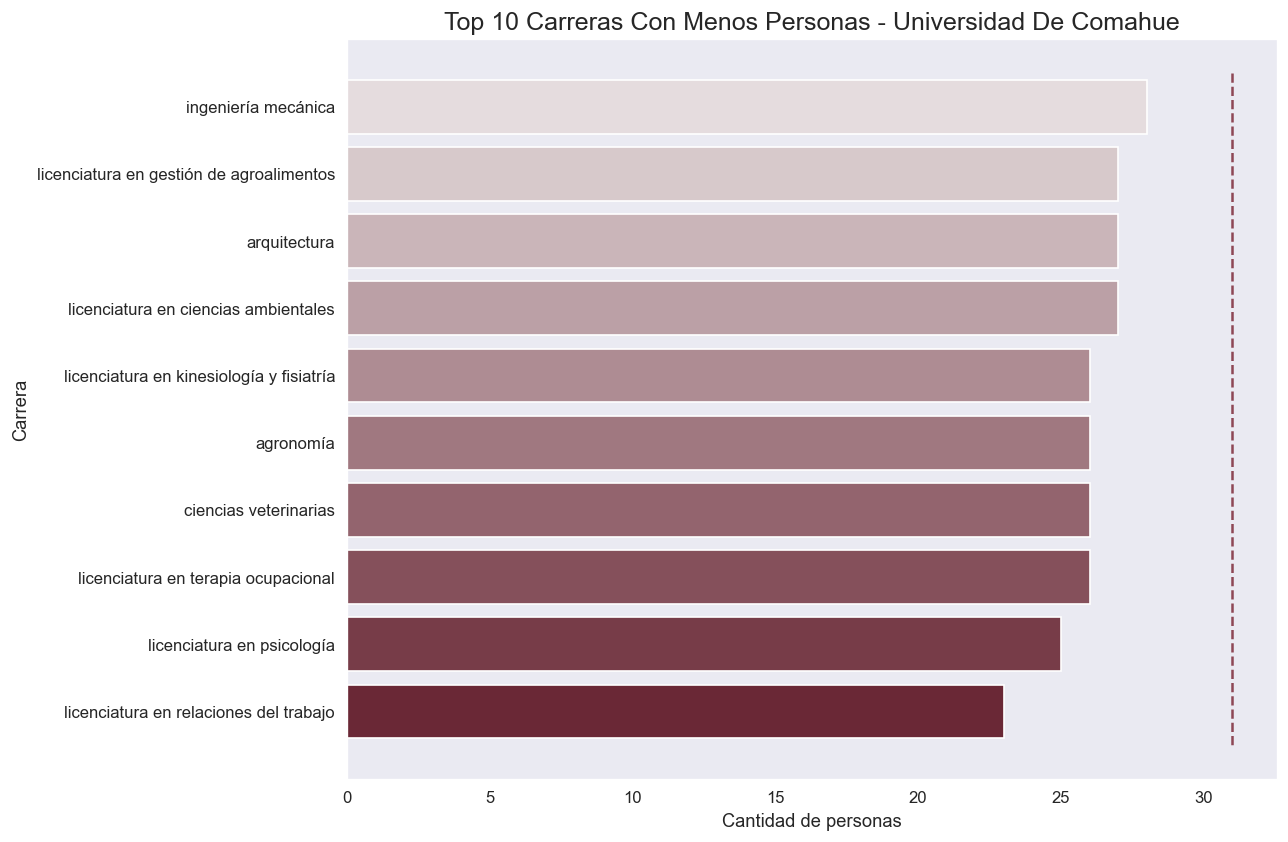

In [88]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, estás 10 carreras son las que menor cantidad de alumnos presenta y que se encuentran alejados de la media de todas las carreras, vista como una línea punteada en el gráfico.

Text(0, 0.5, 'Cantidad de carreras')

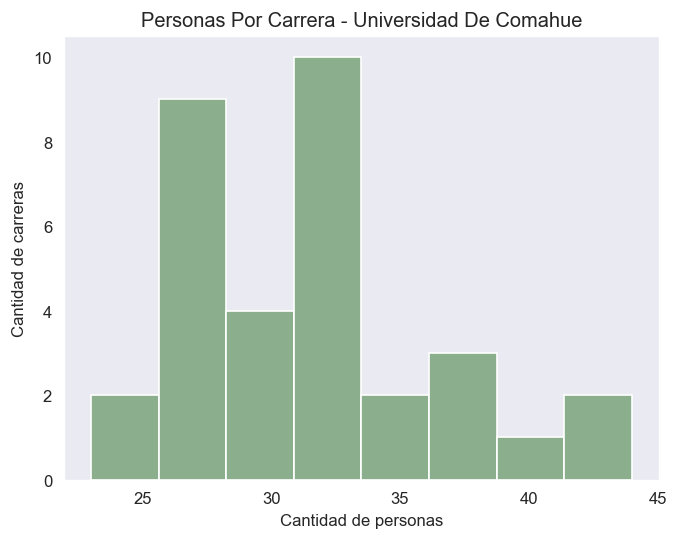

In [89]:
sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [90]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count    33.000000
mean     31.575758
std       5.129756
min      23.000000
25%      27.000000
50%      32.000000
75%      33.000000
max      44.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 31 alumnos y parece estar sesgada hacía la izquierda, con pocos ejemplos de carreras con alumnado mayor a 40 personas.

### Universidad del Salvador

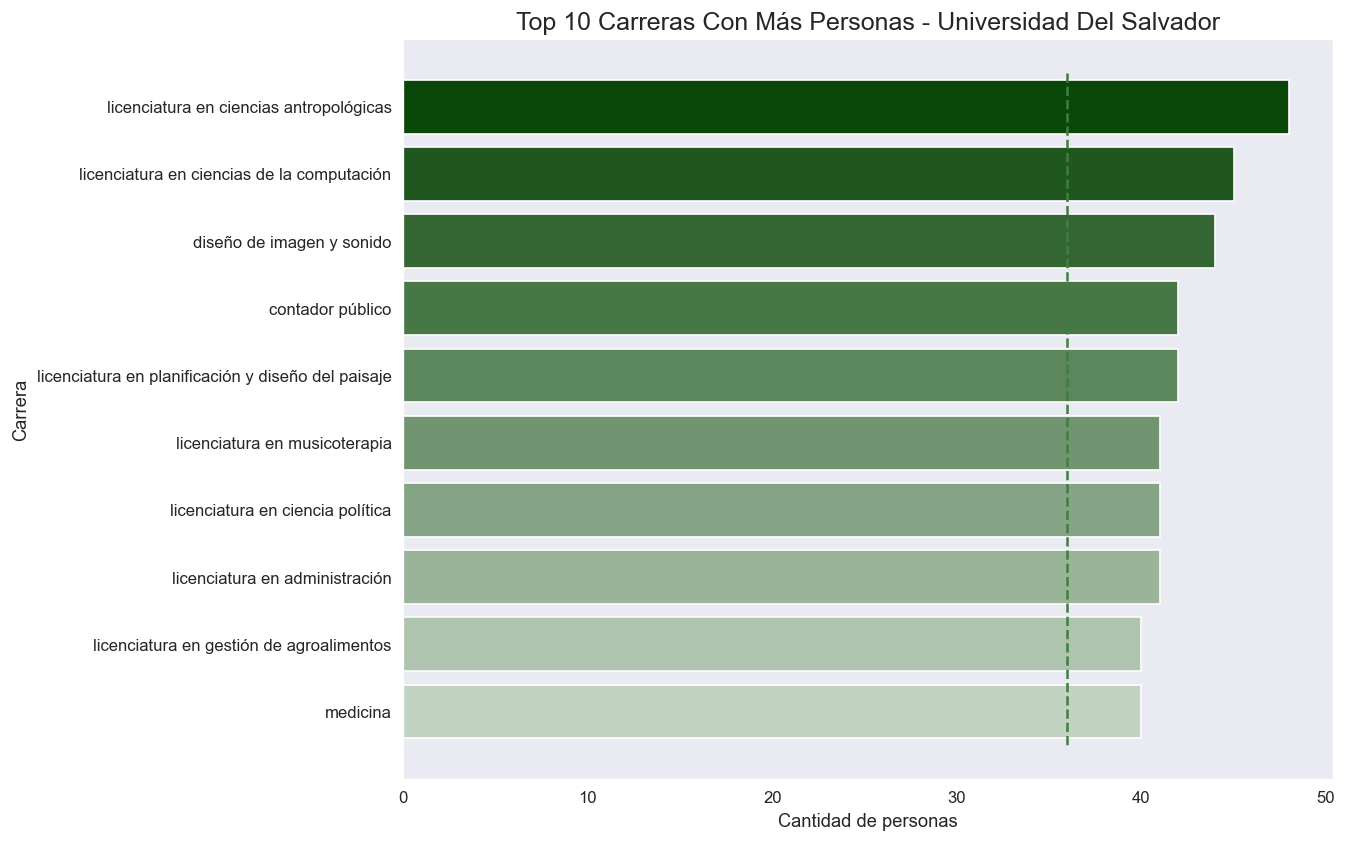

In [91]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

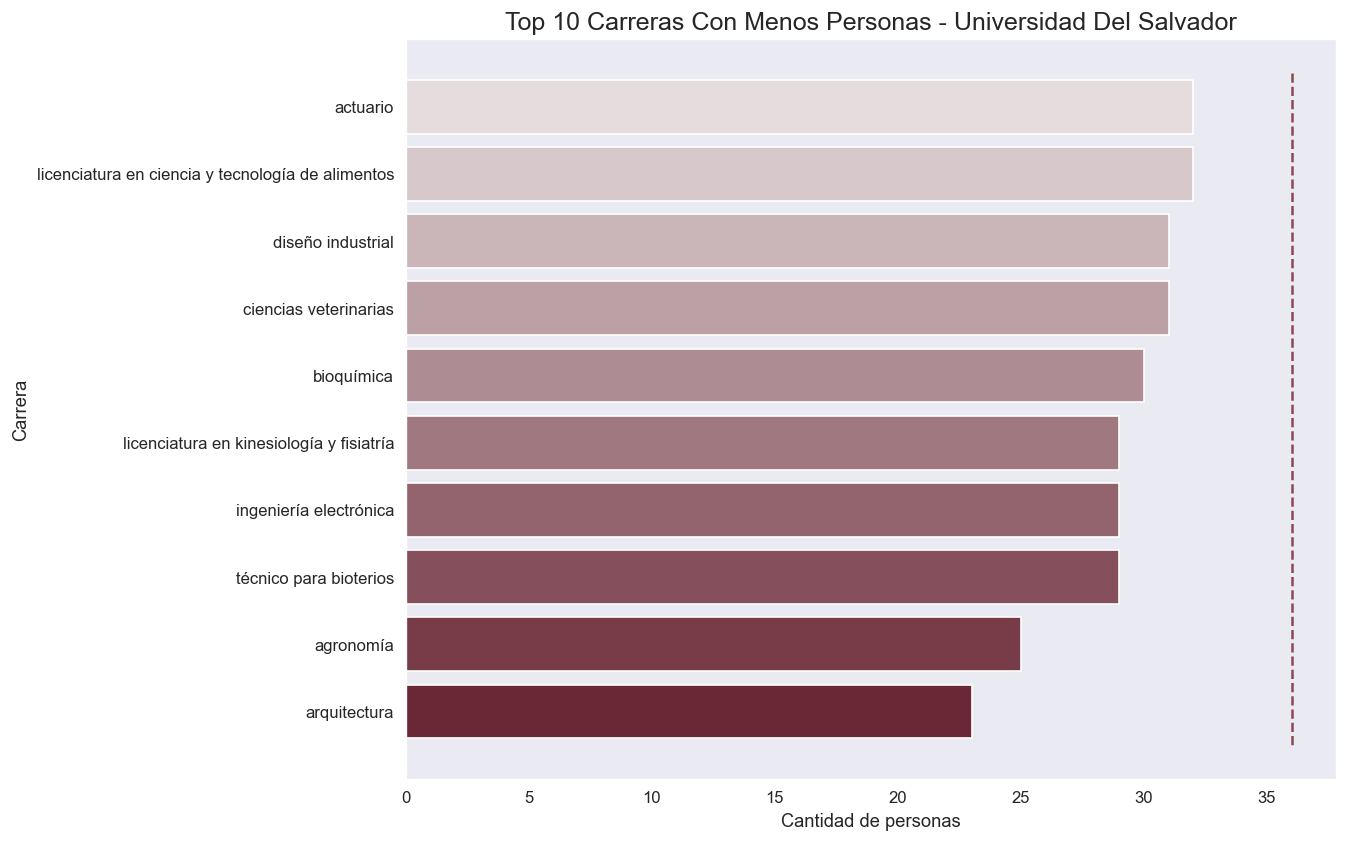

In [92]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Text(0, 0.5, 'Cantidad de carreras')

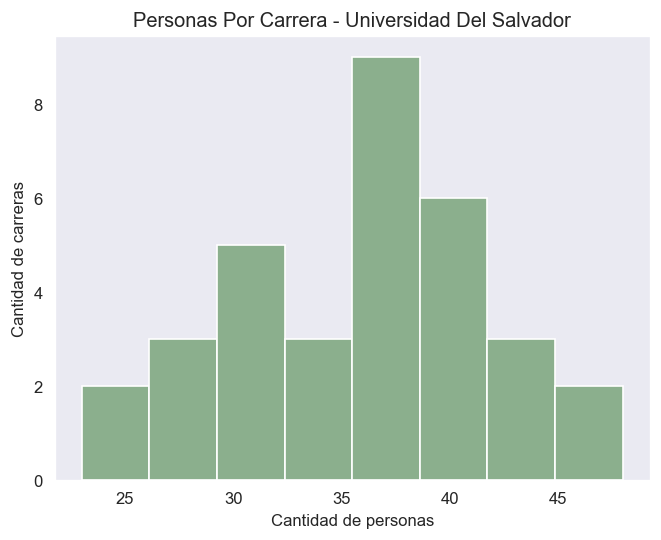

In [93]:
sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [94]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()

count    33.000000
mean     36.000000
std       5.722762
min      23.000000
25%      32.000000
50%      36.000000
75%      40.000000
max      48.000000
Name: career, dtype: float64

En este caso la media es de 129 alumnos por carrera, presentando un minímo de 106, pero la mayoría de las carreras tienen al menos 120 alumnos en esta universidad. Parece tratarse de una distribución normal de las edades.

### Análisis por género y edad - UNCo

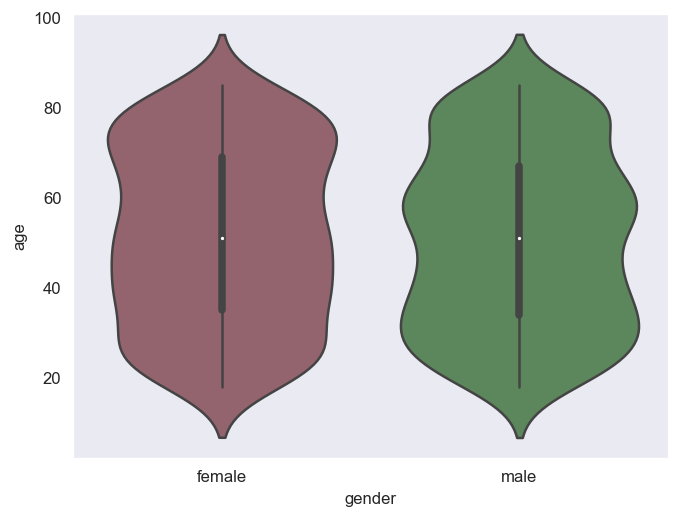

In [95]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución uniforme, con una alta dispersión, aunque si podemos observar una una bimodalidad en el gráfico de varones ubicado aproximadamente en los 30 años y los 60 años.

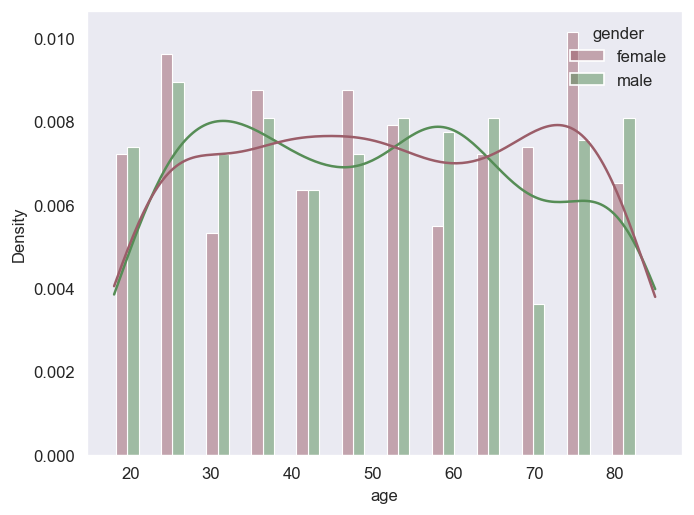

In [96]:
fig, ax = plt.subplots()
sns.histplot(data=df_1,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver las dos modas en la distribución de los varones

### Provincias - UNCo

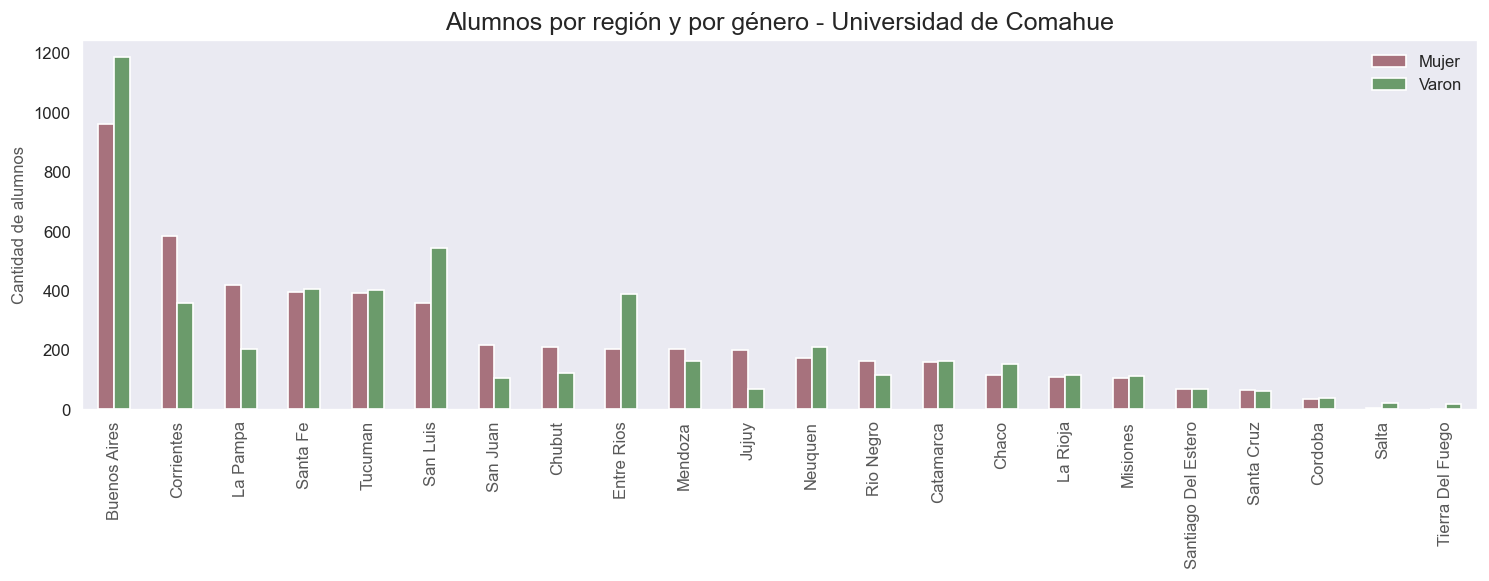

In [97]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

En este gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y es destacable la diferencia entre géneros. Con la provincia que le sigue en aportación de alumnos la universidad de Corrientes posee una gran diferencia entre su cantidad de mujeres frente a los varones.

Text(0.5, 0, '')

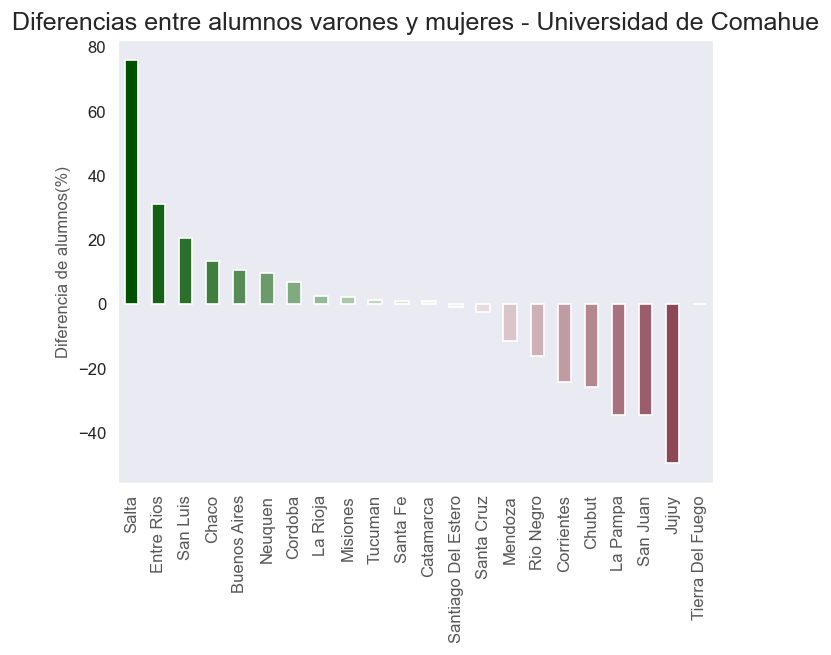

In [98]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Salta es la que presenta mayor disparidad respecto a varones junto con Entre Ríos y San Luís. Respecto a disparidad de mujeres Tierra del FUego, Jujuy y San Juan son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades  - UNCo

In [99]:
df_1.location.value_counts().head(10)

25 de mayo               7
9 de julio               7
colonia lia y allende    5
dique toma               4
aristides villanueva     4
gobernador moyano        4
agua colorada            4
baldes de pacheco        4
arroyo burgos            4
agua salada              4
Name: location, dtype: int64

<AxesSubplot:ylabel='Frequency'>

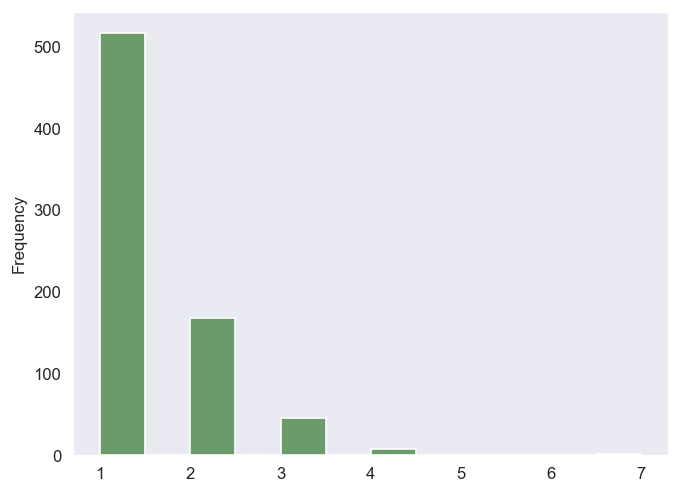

In [100]:
df_1.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

Al parecer **no hay una localidad que destaque** por su aporte de alumnos siendo que la mayoría aporta solo un alumno o dos.

### Análisis por género y edad - USal

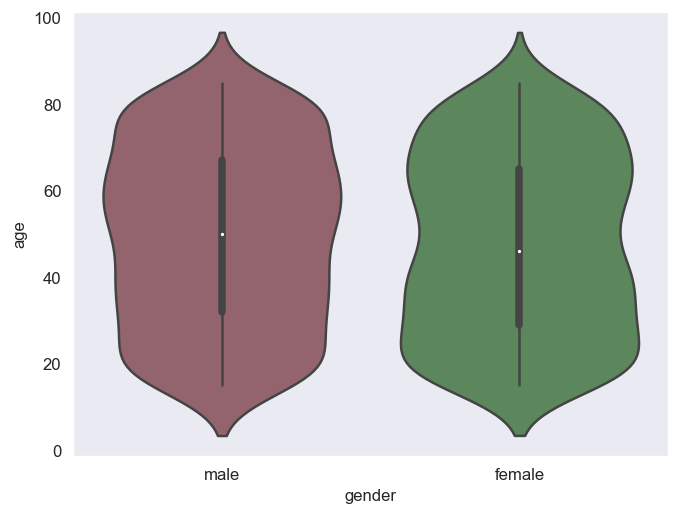

In [101]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

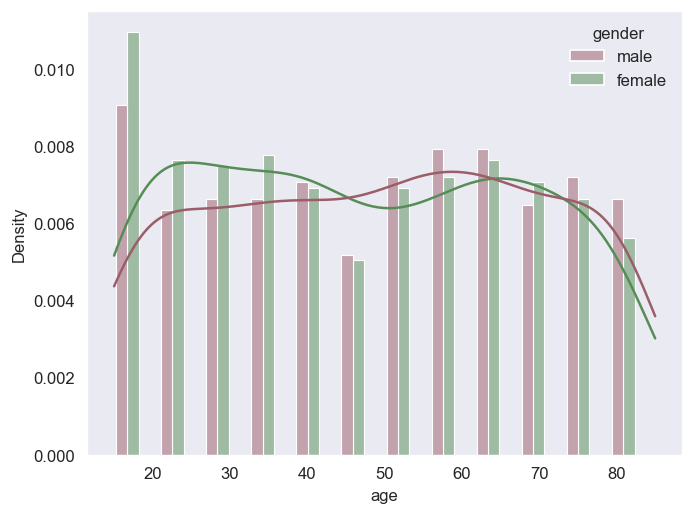

In [102]:
fig, ax = plt.subplots()
sns.histplot(data=df_2,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

La distribución por edades parece tener un pequeño pico en 20 años y una distribución dispersa de las demás edades y de forma uniforme.

### Provincias - USal

C:\Users\julia\AppData\Local\Temp\ipykernel_1528\3775228803.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


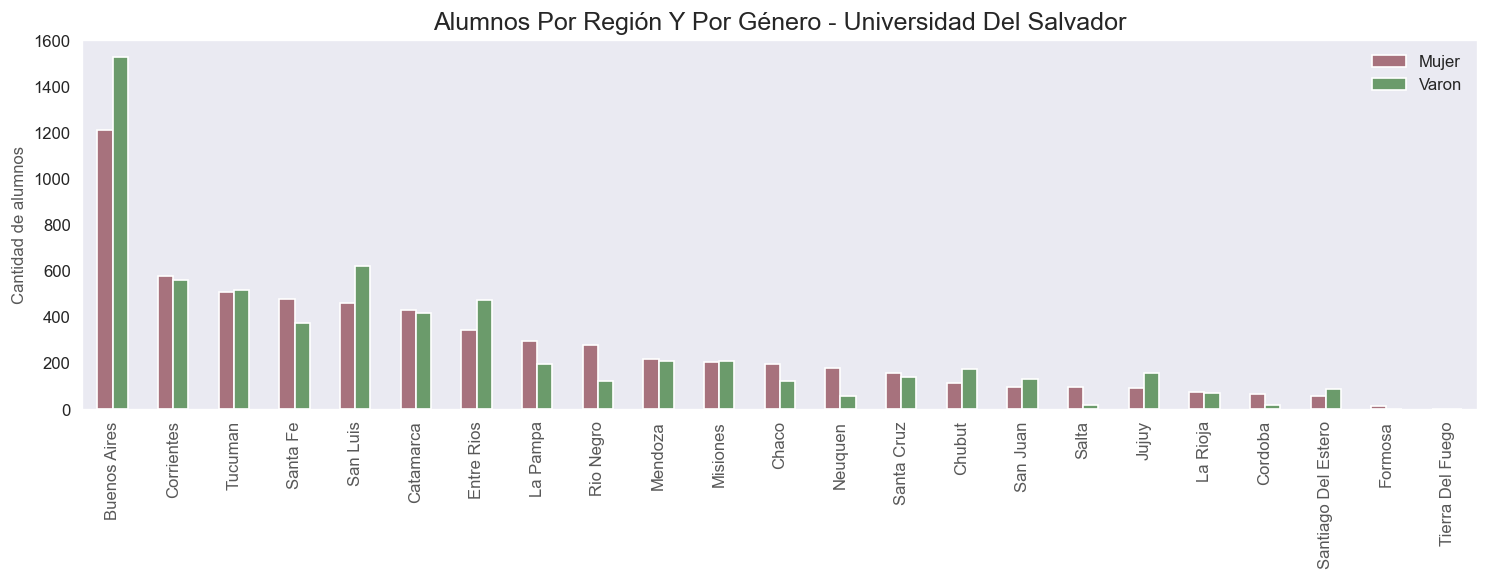

In [103]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'},
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}'.title(),{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

Entre las universidades que más alumnos aporta a la USal las que presentan disparidad de varones es Buenos Aires y San Luís, en terminos de disparidad femenina el que mayor diferencia presenta es Santa Fe

Text(0.5, 0, '')

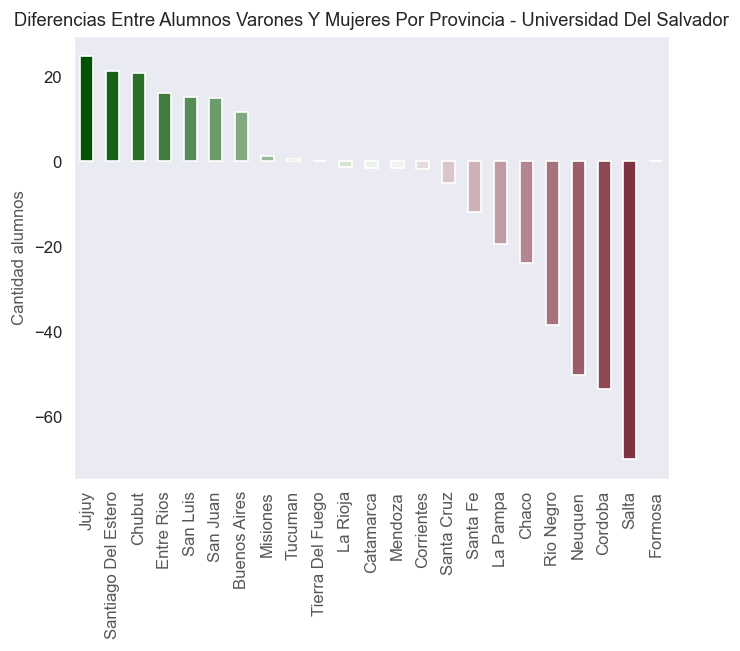

In [104]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres por provincia - {university2_name}'.title(),{'fontsize':11})
ax.set_ylabel('Cantidad alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

De forma porcentual la que mayor disparidad presenta es Jujuy con una disparidad mayor al 20%. Salta, Córdoba y Neuquén son las que mayor disparidad en terminos de género femenino frente a masculino refiere con valores mayores al 40% de mayoría de mujeres.

### Localidades - USal

In [105]:
df_2.location.value_counts().head(10)

alpachiri           8
alegria             6
agua de dionisio    6
agua colorada       5
25 de mayo          5
10 de mayo          5
villa angelica      5
arbol solo          4
piamonte            4
la isabel           4
Name: location, dtype: int64

<AxesSubplot:ylabel='Frequency'>

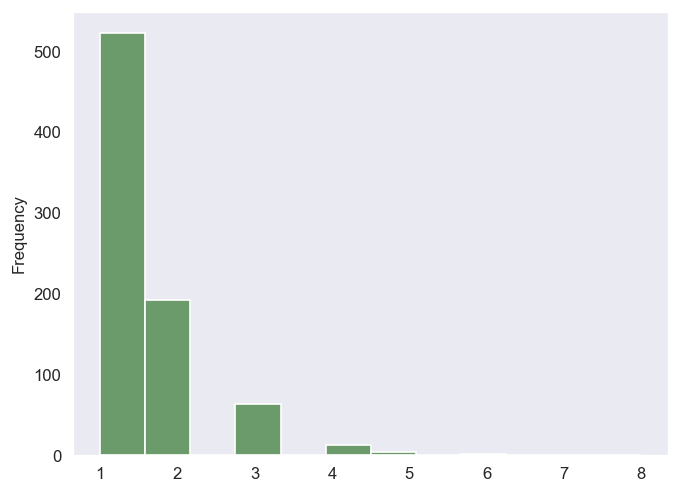

In [106]:
df_2.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

Como vemos aqui parece no haber preferencia en localidades de proveniencia, sino que la mayoría aporta solo 1 o 2 alumnos.

### Segregación por tipo de carrera

In [107]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

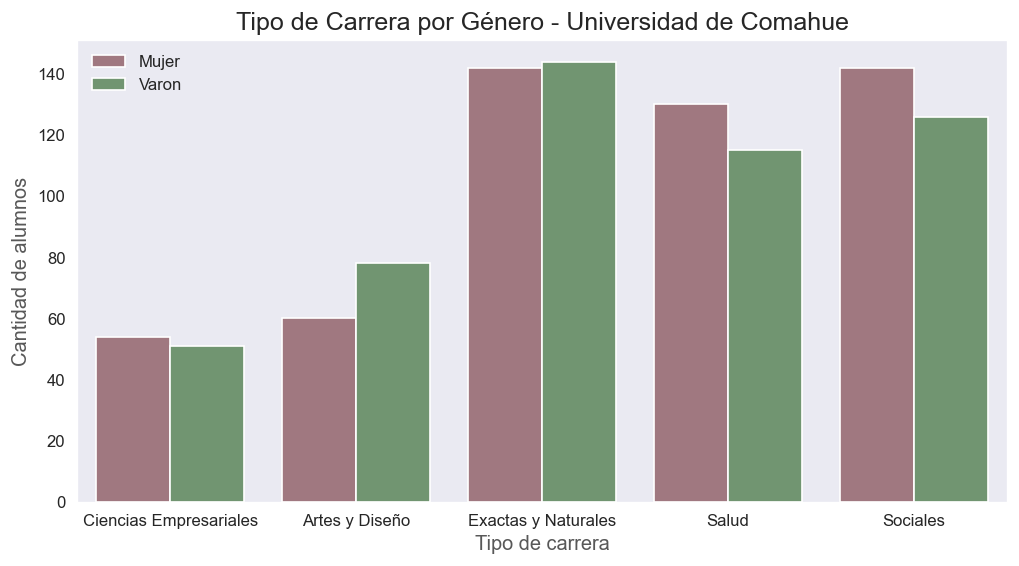

In [108]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


En la UNCo parece haber una disparidad en la cantidad de alumnos en las carreras de Arte y Diseño en donde prevalecen los varones en una buena proporción, esta relación se da de forma inversa en las carreras de Salud y Sociales donde prevalecen las mujeres. En Éxactas y Naturales se da la situación de equidad en ambos géneros.

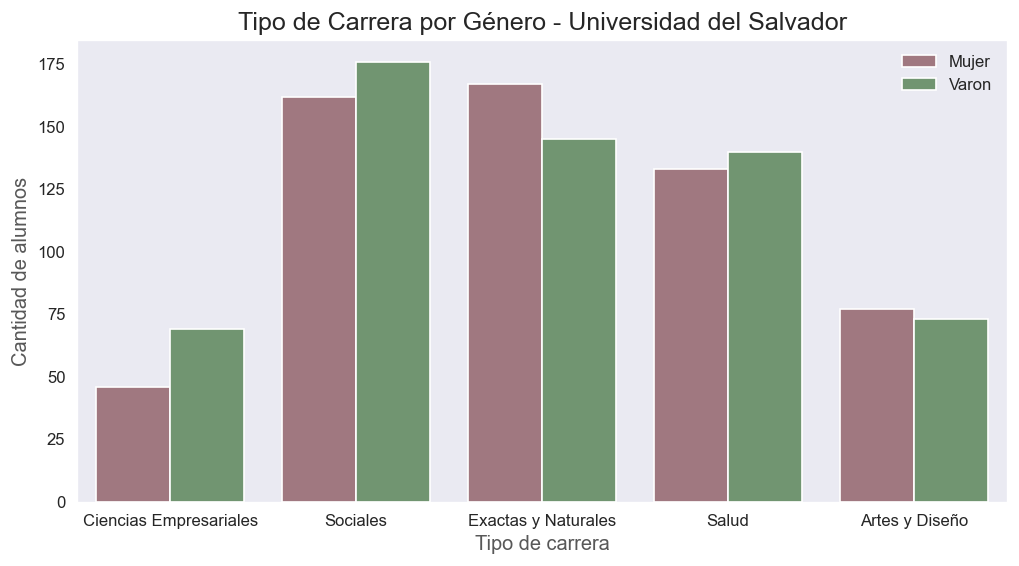

In [109]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

En la USal puede verse como las carreras de Ciencias Empresariales, Sociales y Salud tienen mayor popularidad en alumnos varones frente a Éxactas y naturales y Arte y Diseño donde la mayoría de alumnado declara el género Mujer.

### Top Carreras por Proporción de Alumnas - Universidad Nacional del Comahue

In [110]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.head()

gender,female,male
career,,
arquitectura,0.666667,0.333333
bioquímica,0.655172,0.344828
técnico para bioterios,0.642857,0.357143
licenciatura en ciencias ambientales,0.629630,0.370370
actuario,0.625000,0.375000


**Las mayoría de las carreras que más proporción tiene de mujeres corresponde a carreras relacionadas al arte y el diseño**

In [111]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.tail()

gender,female,male
career,,
diseño de imagen y sonido,0.394737,0.605263
agronomía,0.384615,0.615385
licenciatura en gestión de agroalimentos,0.370370,0.629630
licenciatura en ciencias antropológicas,0.342857,0.657143
licenciatura en artes,0.333333,0.666667


No parece haber un patrón en las carreras menos concurridas. Cabe destacar que tanto Ciencias Veterinarias y Antropología suelen tener actidades de campo.

### Top Carreras por Proporción de Alumnas - Universidad del Salvador

In [112]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.head()

gender,female,male
career,,
actuario,0.750000,0.250000
licenciatura en planificación y diseño del paisaje,0.642857,0.357143
licenciatura en ciencias antropológicas,0.625000,0.375000
técnico para bioterios,0.586207,0.413793
diseño industrial,0.580645,0.419355


En este caso la diferencia a pesar de no ser mayor al 10% se ve una predisposición a las ciencias de la salud y exáctas y naturales.

In [113]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.tail()

gender,female,male
career,,
licenciatura en artes,0.411765,0.588235
ingeniería en informática,0.405405,0.594595
licenciatura en ciencias de la educación,0.400000,0.600000
ingeniería electrónica,0.379310,0.620690
licenciatura en ciencias geológicas,0.324324,0.675676


Las carreras con menos mujeres en esta universidad corresponden a carreras de arte y diseño y ciencias empresariales.

### Algunos ejemplos

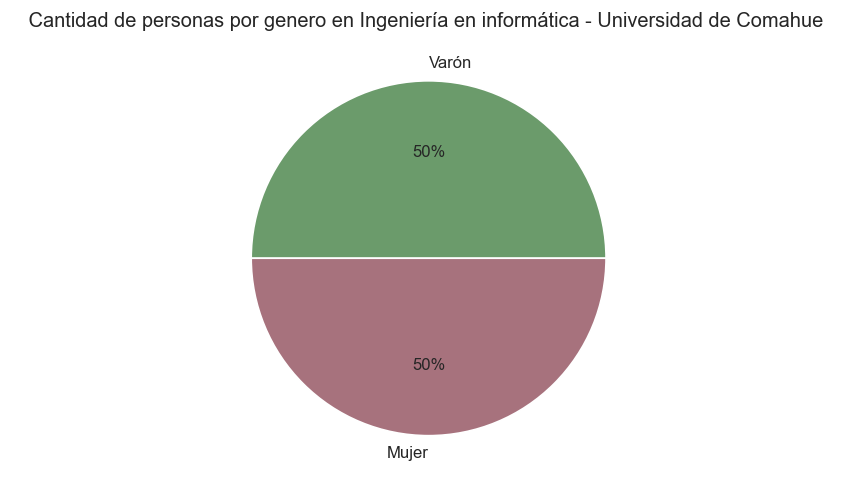

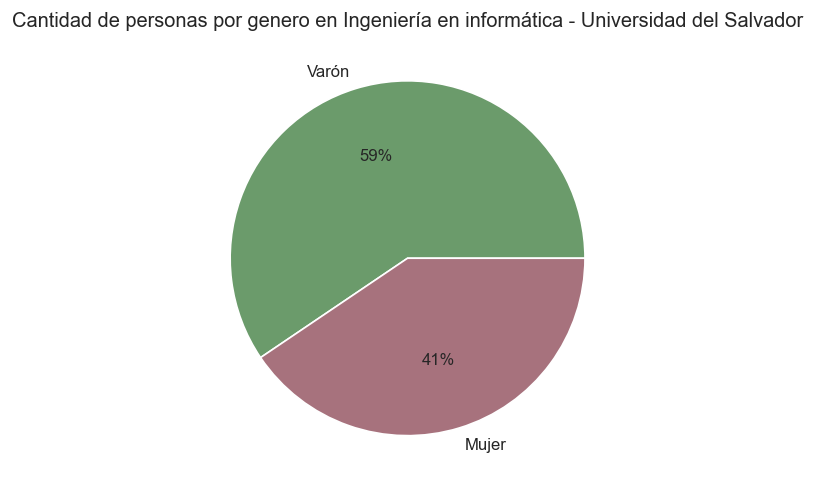

In [114]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, como vemos en este caso, aunque UNCo tiene una diferencia nula de estudiantes de Informática. En el caso de la USal la diferencia es del 8%.

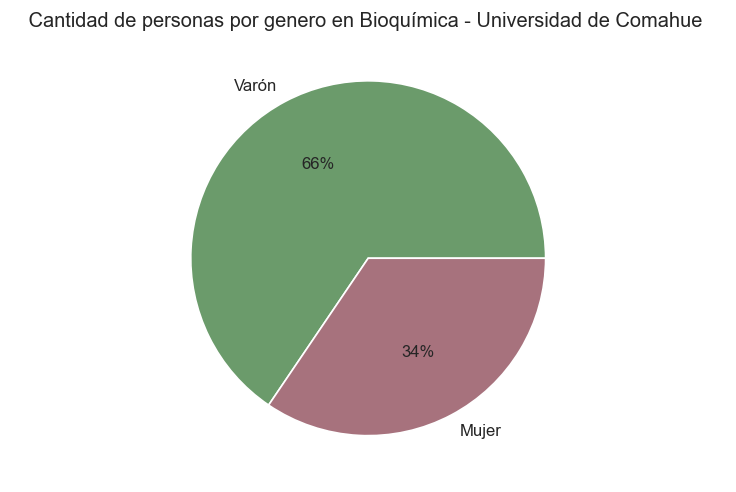

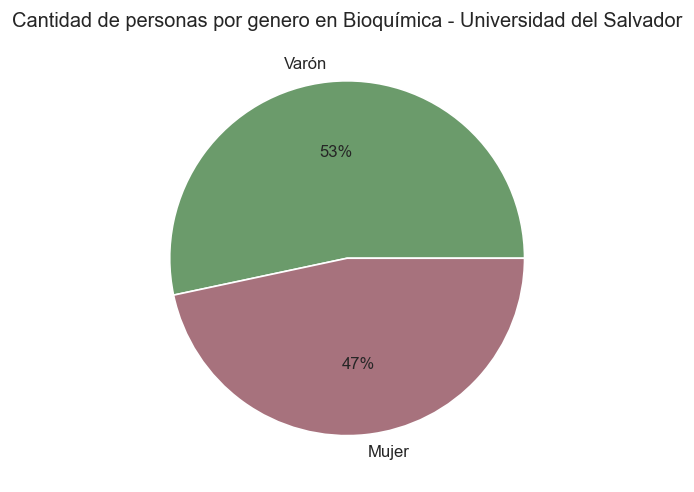

In [115]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

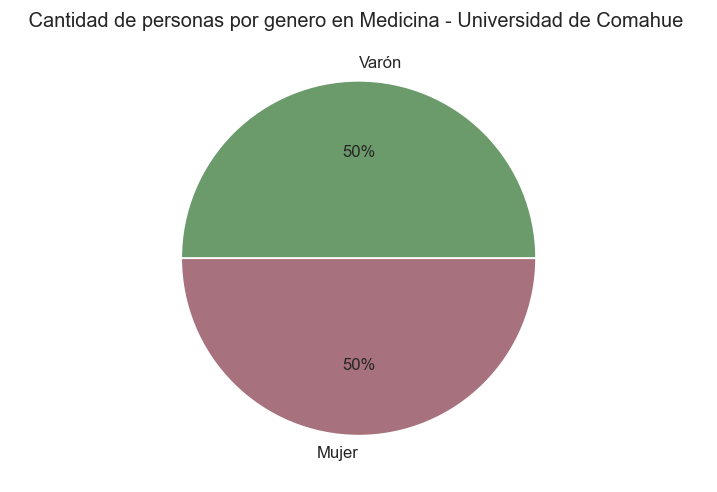

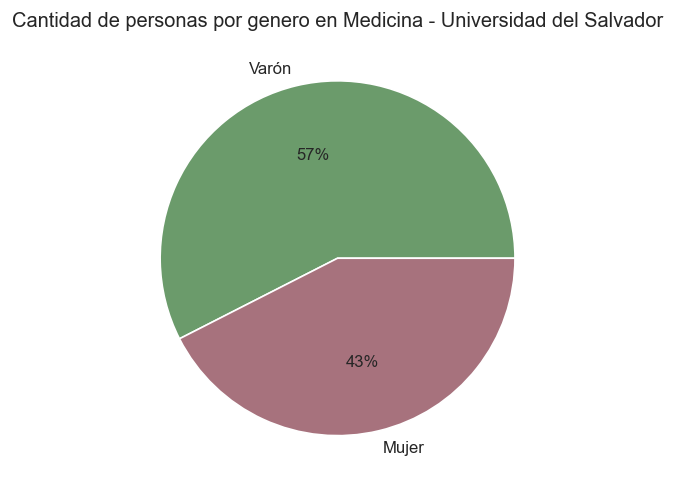

In [116]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

Tanto en Bioquímica como en Medicina, dos carreras que suelen tener el prejuicio de tener más mujeres en ambas carreras para ambas universidades muestran una prevalencia de varones o hasta cierta equidad con diferencias menores al 1% en algunos casos.

# Conclusiones

- UNCO tiene una distribución de la edades uniforme, con lo cuál es importante remarcar que la cantidad de alumnos de todas las edades en edad de trabajo es alta y podría ser interesante la estimulación de turnos y comisiones nocturnas para no interferir con sus actividades.
- UNCO tiene cierta disparidad en todos sus tipos de carreras excepto en Arte y Diseño, con lo cuál se recomienda incentivar y otorgar becas para generar equidad en aquellas con menor proporción de alumnas, especialmente en las carreras de salud.
- USal tiene una distribución similar a una distribución con dos picos en edades en torno a los 20-25 años y luego una distribución homogénea para el resto de las edades, con lo cuál podría incentivarse un aumento de alumnado de mayor edad creando carreras cortas y otorgando becas a personas mayores de 25 años.
- USal presenta cierta inequidad en carreras del ramo de las Ciencias Empresariales, Sociales y Salud, con lo cuál podría fomentarse becas femeninas para cubrir ese cupo y buscar una equidad de género en estos casos.